In [1]:
import pandas as pd
import statsmodels.api as st
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
raw_data=pd.read_csv('1.04.+Real-life+example.csv')

In [3]:
#Data preprocessing
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [7]:
##handling the missing values
## we know that we have 172 missing value for price and 150 missing values for engineV
##so we will check exactly how how much columns will be removed
##if the total column to be removed is less than 5% compared to the total number of columns the it is fine##

missing_rows=raw_data[raw_data['Price'].isna() | raw_data['EngineV'].isna()]
print("number of rows to be dropped:",missing_rows.shape[0])

number of rows to be dropped: 320


In [8]:
#320 rows to be dropped , which means around 7.4% of the total rows , yes it is still acceptable
#as considering the columns with missing values are critical

In [9]:
#Drop rows with missing values ,Drop rows where either Price or EngineV is missing
data_cleaned=raw_data.dropna(subset=['Price','EngineV'])
print("shape after dropping",data_cleaned.shape)

shape after dropping (4025, 9)


In [10]:
#Removing Outliers
#Most consumer vehicles have engine volumes up to 6.5 liters.
#Anything beyond that is likely an error or a special case we don't want skewing the model.
## Keep only cars with Engine Volume <= 6.5
Data_no_enginev_outliers=data_cleaned[data_cleaned['EngineV']<=6.5]
rows_deleted=data_cleaned.shape[0] - Data_no_enginev_outliers.shape[0]
print("number of rows deleted after enginev oultliers removal: ",rows_deleted)

number of rows deleted after enginev oultliers removal:  22


In [11]:
Data_no_enginev_outliers.describe

<bound method NDFrame.describe of               Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991         

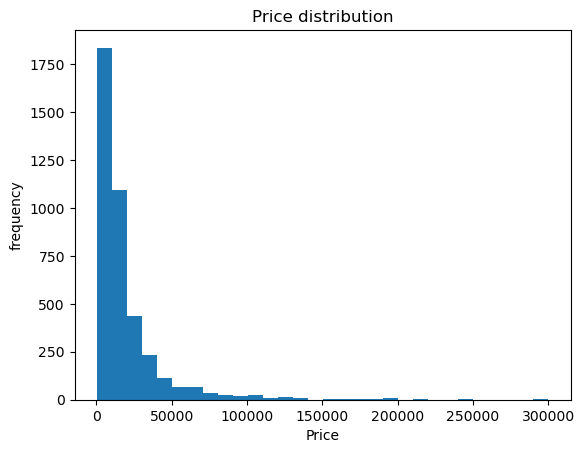

In [12]:
#Remove price outliers
#So we want to check the extreme price skewness with matplotlib first
plt.hist(Data_no_enginev_outliers['Price'],bins=30)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('frequency')
plt.show()

In [13]:
#filter out price >=100000
data_no_price_outliers=Data_no_enginev_outliers[Data_no_enginev_outliers['Price']<100000]
#print how many data want to be removed 
removed_priced_rows=Data_no_enginev_outliers.shape[0]- data_no_price_outliers.shape[0]
print("number of rows based on price>10000:", removed_priced_rows)

number of rows based on price>10000: 86


In [14]:
# Final cleaned data shape
print("Final shape after removing Price outliers:", data_no_price_outliers.shape)

Final shape after removing Price outliers: (3917, 9)


In [15]:
#replacing categorical variables with dummy variables -one hot encoding can be used
#firstly we can copy our available date to new dataset
data_encoded=data_no_price_outliers.copy()



In [16]:
#let's check how many unique columns exist for each category, 
#so that we can decide whether we want to hot encode or not
print("unique model value :",data_encoded['Model'].nunique())
print("unique brand value :",data_encoded['Brand'].nunique())
print ("unique body value :",data_encoded['Body'].nunique())
print("unique Engine type :",data_encoded['Engine Type'].nunique())
print("unique Registration :",data_encoded['Registration'].nunique())


unique model value : 299
unique brand value : 7
unique body value : 6
unique Engine type : 4
unique Registration : 2


In [17]:
#so high cardinality on model so we are dropping it 
#299 unique value will reduce the performance of our model, 
data_encoded=data_encoded.drop(columns=['Model'])


In [18]:
data_encoded

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [19]:
data_encoded.shape


(3917, 8)

In [20]:
# now we are changing registration from yes/no to 1/0
data_encoded['Registration']=data_encoded['Registration'].map({'yes':1,'no':0})

In [21]:
#one hot encoding on other categorical columns
#pd.get_dummies is the pandas methos for creating one hot encoded dummy variables
#drop_fisrt=true , to avaond multicolinearity, the result of other columns will definitely predicts the first one anyway
data_encoded = pd.get_dummies(data_encoded, columns=['Brand', 'Body', 'Engine Type'], drop_first=True)

In [22]:
data_encoded.head()

,Price,Mileage,EngineV,Registration,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,7900.0,427,2.9,1,1999,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,13300.0,358,5.0,1,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,23000.0,240,4.2,1,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,18300.0,120,2.0,1,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [23]:
data_encoded=data_encoded.astype(int)

In [24]:
data_encoded.head()

,Price,Mileage,EngineV,Registration,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200,277,2,1,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900,427,2,1,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300,358,5,1,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000,240,4,1,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300,120,2,1,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [25]:
#Lest standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_to_scale=['Mileage','EngineV','Year']
#fit and transform data
data_encoded[features_to_scale]=scaler.fit_transform(data_encoded[features_to_scale])
print(data_encoded[features_to_scale].head())

    Mileage   EngineV      Year
0  1.080904 -0.079260 -2.291196
1  2.551314 -0.079260 -1.085518
2  1.874925  2.813251 -0.482679
3  0.718202  1.849080  0.120160
4 -0.458126 -0.079260  0.722999


In [30]:
#Now we can create the model
from sklearn.model_selection import train_test_split
X=data_encoded.drop('Price',axis=1)
Y=data_encoded['Price']
#Train test split method
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [32]:
#fit the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#model.fit(X_train, y_train) tells the model to learn the best-fitting line using your training data.
#Under the hood, it’s finding the best weights (coefficients) for each feature that minimize prediction error on y_train.
model.fit(x_train,y_train)

LinearRegression()

In [34]:
#now we hae successfully trained the data , next thing is to predict the unseen data using x_test
y_pred=model.predict(x_test)

In [52]:
#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
#R square evaluation
r2_score=r2_score(y_test,y_pred)
#MAE-mean absolute error
mae=mean_absolute_error(y_test,y_pred)
# Display results
print(f"R² Score: {r2_score:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


R² Score: 0.6298
Mean Absolute Error (MAE): 6189.54
